# ML_LinearRegression

Credits:

- [2021 Python for Machine Learning & Data Science Masterclass by Jose Portilla Udemy](https://www.udemy.com/course/python-for-machine-learning-data-science-masterclass/)

**Supervised Learning**
- Using historical and labeled data, the machine learning model predicts a value.
    - Historical: Known results and data from the past.
    - Labeled: The desired output is known
- Two main label types
    - Categorical Value to Predict -> **Classification** Task
        - Cancerous vs. Benign Tumor
        - Fulfillment vs. Credit Default
        - Assigning Image Category (Handwriting Recognition)

    - Continuous Value to Predict -> **Regression** Task
        - Future prices
        - Electricity loads
        - Test scores

**Unsupervised Learning**
- Applied to unlabeled data, the machine learning model discovers possible patterns in the data. The ML model groups and interprets data without a label.
- Example: Clustering customers into separate groups based off their behaviour features.
- Major downside is because there was no historical “correct” label, it is much harder to evaluate performance of an unsupervised learning algorithm.

<a id='toc'></a>

- [Linear Regression](#1)
    - OLS, Simple Linear Regression, Linear Regression
    - Evaluation Metrics (MAE, MSE, RMSE, Residuls)
    - Linear Regression with Python
        - Simple Linear Regression, Polynomial Linear Regression
- [Scikit-Learn](#2)
    - General ML framewrok for supervised learning
    - Linear Regression with Scikit-Learn
        - Multiple Linear Regression (LR for multiple features)
            - Model Deployement (dump, load)
- [Polynomial Linear Regeression](#3)
    - Non-linear feature-label relationships
    - Interaction terms between features
    - Comparison with Linear Regression
- [Bias-Variance Trade Off](#4)
    - Overfitting, Underfitting
- [Feature Scaling](#5)
    - Standardization, Normalization
- [Regularization](#6)
    - L1 (LASSO Regressoin), L2 (Ridge Regerssion), Elastic Net 
- [Cross Validaiton](#7)
    - RidgeCV, LassoCV, ElasticNetCV
    - cross_val_score(), cross_validate(), GridSearchCV()

<a id='1'></a>
## Linear Regression

**Ordinary Least Squares** (OLS) works by minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given dataset and those predicted by the linear function. 

<img src="images/LR03.png" style="float:center;" alt="drawing" width="800"/>
<img src="images/LR06.png" style="float:center;" alt="drawing" width="800"/>
<img src="images/LR05.png" style="float:center;" alt="drawing" width="800"/>

Linear Regression OLS Theory: We can see for y=mx+b there is only room for one possible feature x. OLS will allow us to directly solve for the slope m and intercept b. However, we’ll need tools like gradient descent to scale this to multiple features.

**Simple Linear Regression** (only one feature)
<img src="images/LR01.png" style="float:center;" alt="drawing" width="600"/>

**Multiple Linear Regression** (multiple features)
<img src="images/LR02.png" style="float:center;" alt="drawing" width="600"/>
<img src="images/LR07.png" style="float:center;" alt="drawing" width="600"/>


Unfortunately, it is not scalable to try to get an analytical solution to minimize this cost function. Taking the cost function derivative and then solving for zero to get the set of Beta coefficients will be too difficult to solve directly through an analytical solution. Instead we can describe this cost function through vectorized matrix notation and use gradient descent to have a computer figure out the set of Beta coefficient values that minimize the cost/loss function. Use a gradient to express the derivative of the cost function with respect to each β. We use Gradient Descent method to compute the optimal values of β.

**Evaluation Metrics**
The three most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

**Residuals**
- Often for Linear Regression it is a good idea to separately evaluate residuals (y-ŷ) and not just calculate performance metrics (e.g. RMSE).
- The residual errors should be random and close to a normal distribution.
- Residual plot shows residual error vs. true y value. There should be no clear line or curve.

<img src="images/Res1.png" style="float:center;" alt="drawing" width="600"/>

- What about non valid datasets? Residual plot showing a clear pattern, indicating Linear Regression no valid!

<img src="images/Res3.png" style="float:center;" alt="drawing" width="750"/>

### Linear Regression with Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Advertising.csv')
df.sample(3)

,TV,radio,newspaper,sales
6,57.5,32.8,23.5,11.8
109,255.4,26.9,5.5,19.8
163,163.5,36.8,7.4,18.0


In [3]:
# add an engineered feature
df['total_spend'] = df['TV']+df['radio']+df['newspaper']
df.sample(3)

,TV,radio,newspaper,sales,total_spend
18,69.2,20.5,18.3,11.3,108.0
177,170.2,7.8,35.2,11.7,213.2
12,23.8,35.1,65.9,9.2,124.8


#### Simple Linear Regression for a single feature

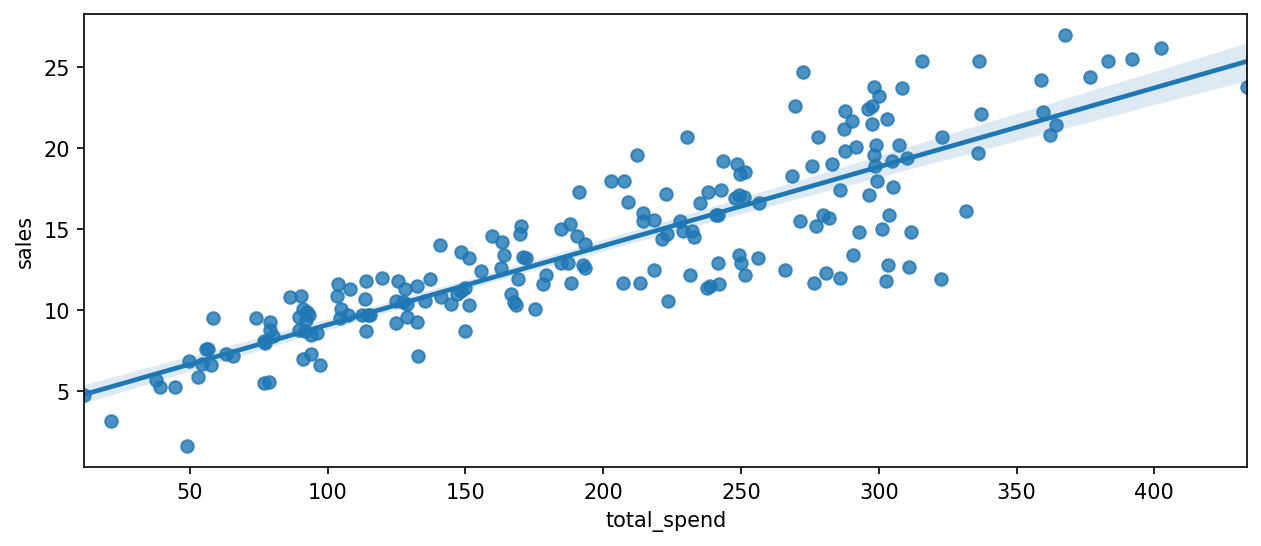

In [4]:
# look at the feature and output
plt.figure(figsize=(10,4), dpi=150)
sns.regplot(x='total_spend', y='sales', data=df); # regression plot

[0.04868788 4.24302822]


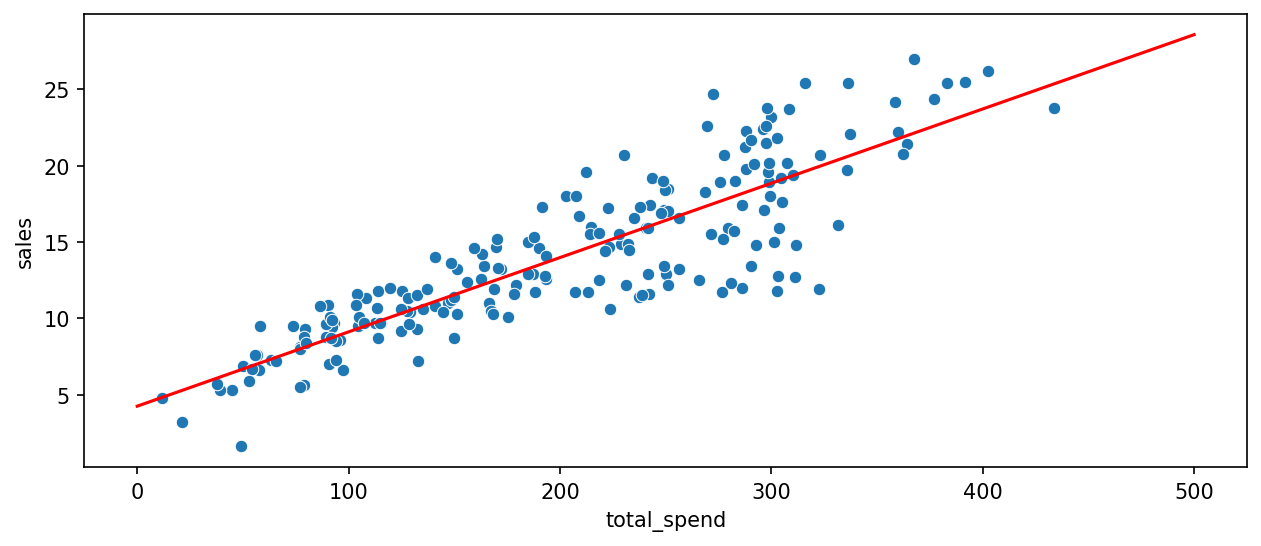

In [5]:
# the above plot can be replicated with some calculations
X = df['total_spend']
y = df['sales']

# polyfit in numpy
print(np.polyfit(X,y,deg=1)) # deg=1 implies simple linear regression

# predict sales for a range of spend
potential_spend = np.linspace(0,500,100)
predicted_sales = 0.04868788*potential_spend + 4.24302822

plt.figure(figsize=(10,4), dpi=150)
plt.plot(potential_spend, predicted_sales, c='r');
sns.scatterplot(x='total_spend', y='sales', data=df);

#### Polynomial Linear Regression (for a single feature)

[ 3.07615033e-07 -1.89392449e-04  8.20886302e-02  2.70495053e+00]


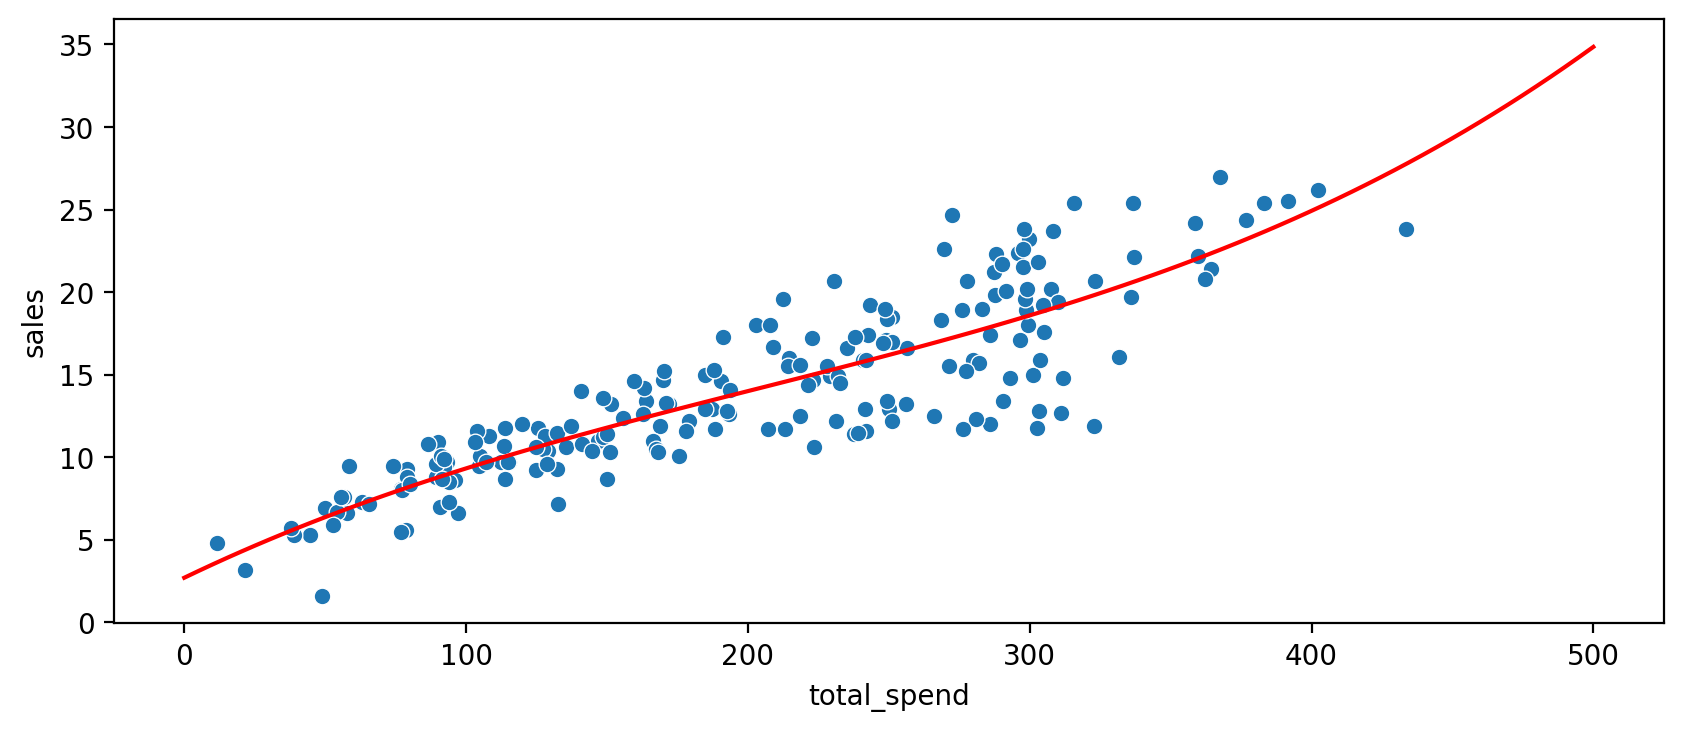

In [6]:
# increasing the polynomial degree
X = df['total_spend']
y = df['sales']

# polyfit in numpy
print(np.polyfit(X,y,deg=3)) # deg>1 implies simple poly regression

# predict sales for a range of spend
potential_spend = np.linspace(0,500,100)
predicted_sales = 3.07615033e-07*potential_spend**3 + \
                  -1.89392449e-04*potential_spend**2 + \
                  8.20886302e-02*potential_spend + 2.70495053e+00

plt.figure(figsize=(10,4), dpi=200)
plt.plot(potential_spend, predicted_sales, c='r');
sns.scatterplot(x='total_spend', y='sales', data=df);

[top](#toc)

<a id='2'></a>
## Scikit-Learn

- Scikit-learn is a library containing many machine learning algorithms. It utilizes a generalized “estimator API” framework to calling the models. This means the way algorithms are imported, fitted, and used is uniform across all algorithms.
- Scikit-learn also comes with many convenience tools, including train test split functions, cross validation tools, and a variety of reporting metric functions.
- Philosophy of Scikit-Learn
    - Scikit-Learn’s approach to model building focuses on applying models and performance metrics.
    - This is a more pragmatic industry style approach rather than an academic approach of describing the model and its parameters.
    
### General ML framewrok for supervised learning
```
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.model_family import ModelAlgo
mymodel = ModelAlgo(param1,param2)
mymodel.fit(X_train,y_train)
predictions = mymodel.predict(X_test)

from sklearn.metrics import error_metric
performance = error_metric(y_test,predictions)

```

This framework will be similar for any supervised machine learning algorithm.

### Linear Regression with Scikit-Learn

In [7]:
df = pd.read_csv('data/Advertising.csv')
df.sample(3)

,TV,radio,newspaper,sales
23,228.3,16.9,26.2,15.5
181,218.5,5.4,27.4,12.2
170,50.0,11.6,18.4,8.4


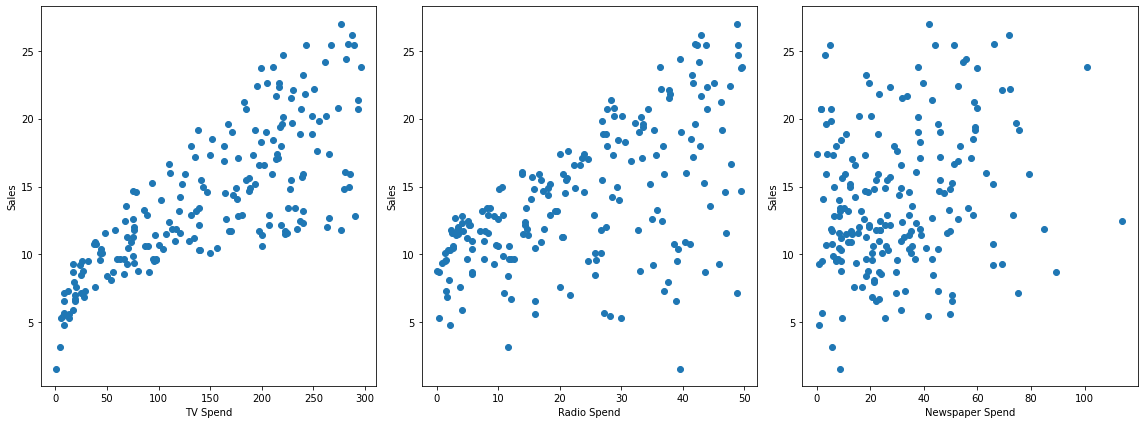

In [8]:
# look at the feature(s) and output
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

ax[0].plot(df['TV'],df['sales'],'o')
ax[0].set_ylabel('Sales')
ax[0].set_xlabel('TV Spend')

ax[1].plot(df['radio'],df['sales'],'o')
ax[1].set_ylabel('Sales')
ax[1].set_xlabel('Radio Spend')

ax[2].plot(df['newspaper'],df['sales'],'o')
ax[2].set_ylabel('Sales')
ax[2].set_xlabel('Newspaper Spend')

plt.tight_layout()

In [9]:
# data
X = df.drop('sales', axis=1)
y = df['sales']

In [10]:
# train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                test_size=0.3, random_state=42)

#### Multiple Linear Regression (LR for multiple features)

In [11]:
# create a model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
test_predictions = model.predict(X_test)

In [12]:
# evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
mae, rmse

(1.5116692224549084, 1.9485372043446383)

In [13]:
# comparing with mean of output
df['sales'].mean()

14.0225

mse and rmse are in 10% error range wrt output (sales) values

Text(0, 0.5, 'residual')

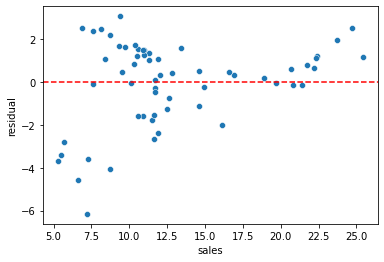

In [14]:
# evaluating residuals (y-y^)
test_residuals = y_test - test_predictions

# residual plot
sns.scatterplot(x=y_test, y=test_residuals);
plt.axhline(y=0, c='r', ls='--')
plt.ylabel('residual')

Text(0.5, 6.79999999999999, 'residual')

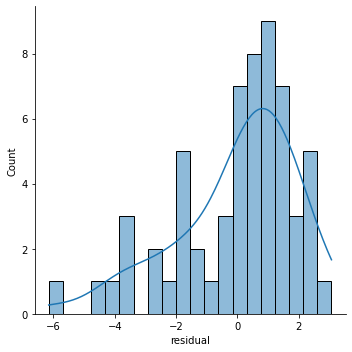

In [15]:
# residual distribution plot
sns.displot(x=test_residuals, bins=20, kde=True);
plt.xlabel('residual')

The residual has no pattern and is distributed close to 0. Great!

Interpreting the coefficients

In [16]:
# what we can understand fromt the model coeffs?
final_model = model  #LinearRegression()
final_model.fit(X,y) # fit the final model assuming it to be the best
final_model.coef_    # Coeff. for TV, radio and newpaper spend

array([ 0.04576465,  0.18853002, -0.00103749])

* Holding all other features fixed, a 1 unit (A thousand dollars) increase in TV Spend is associated with an increase in sales of  0.045 "sales units", in this case 1000s of units. 
* This basically means that for every \$1000 dollars spend on TV Ads, we could expect 45 more units sold.


* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Radio Spend is associated with an increase in sales of  0.188 "sales units", in this case 1000s of units. 
* This basically means that for every $1000 dollars spend on Radio Ads, we could expect 188 more units sold.


* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Newspaper Spend is associated with a **decrease** in sales of  0.001 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Newspaper Ads, we could actually expect to sell 1 less unit. Being so close to 0, this heavily implies that newspaper spend has no real effect on sales.

Note! In this case all our units were the same for each feature (1 unit = $1000 of ad spend). But in other datasets, units may not be the same, such as a housing dataset could try to predict a sale price with both a feature for number of bedrooms and a feature of total area like square footage. In this case it would make more sense to *normalize* the data, in order to clearly compare features and results.

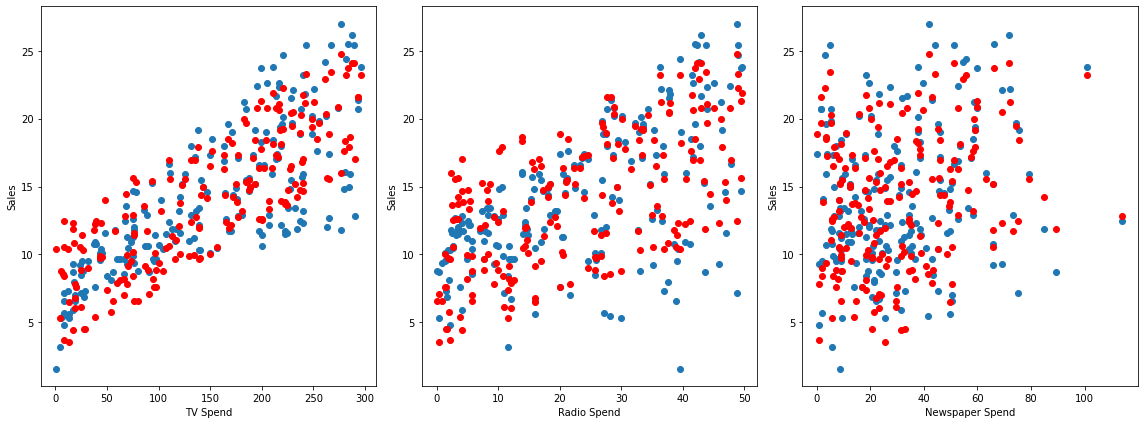

In [17]:
# compare the feature(s) and output both true and predicted
y_hat = final_model.predict(X)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

ax[0].plot(df['TV'],df['sales'],'o')
ax[0].plot(df['TV'],y_hat,'o',c='r')
ax[0].set_ylabel('Sales')
ax[0].set_xlabel('TV Spend')

ax[1].plot(df['radio'],df['sales'],'o')
ax[1].plot(df['radio'],y_hat,'o',c='r')
ax[1].set_ylabel('Sales')
ax[1].set_xlabel('Radio Spend')

ax[2].plot(df['newspaper'],df['sales'],'o')
ax[2].plot(df['newspaper'],y_hat,'o',c='r')
ax[2].set_ylabel('Sales')
ax[2].set_xlabel('Newspaper Spend')

plt.tight_layout()

#### Model Deployement (dump. load)

* Retraining Model on Full Data: If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data. (If we were not satisfied, we could update parameters or choose another model).

* Save model - Load Model - Apply to New Data

In [18]:
# dumping (saving) and loading a model
from joblib import dump,load

dump(final_model, 'models/final_sales_model.joblib')
loaded_model = load('models/final_sales_model.joblib')
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [19]:
# perdict for some campaign
campaign = [[149,22,12]] # must have the same shape as X which is 2D
loaded_model.predict(campaign)

array([13.893032])

[top](#toc)

<a id='3'></a>
## Polynomial Regeression

- How can we now improve on a Linear Regression model? One approach is to consider higher order relationships on the features.

- There are two issues polynomial regression will address for us:

    - **Non-linear feature-label relationships**: where the relationship could be more linear. Even more so for higher orders!
    <img src="images/PR1.png" style="float:center;" alt="drawing" width="800"/>
    
    Keep in mind this is an exaggerated example, and not every feature will have relationships at a higher order. The main point here is to show it could be reasonable to solve for a single linear Beta coefficient for polynomial of an original feature.

    - **Interaction terms between features**: What if features are only significant when in sync with one another? Synergy!
    
    For example: Perhaps newspaper advertising spend by itself is not effective, but greatly increases effectiveness if added to a TV advertising campaign.
    
    Simplest way is to create a new feature that multiplies two existing features together to create an interaction term. We can keep the original features, and add on this interaction term. Fortunately Scikit-Learn does this for us easily through a preprocessing call. 
    
    **PolynomialFeatures** which automatically creates both higher order feature polynomials and the interaction terms between all feature combinations. The features created include:
        - The bias (the value of 1.0)
        - Values raised to a power for each degree (e.g. x^1, x^2, x^3, …)
        - Interactions between all pairs of features (e.g. x1 * x2, x1 * x3, …)



In [20]:
df.sample(5)

,TV,radio,newspaper,sales
36,266.9,43.8,5.0,25.4
51,100.4,9.6,3.6,10.7
45,175.1,22.5,31.5,14.9
100,222.4,4.3,49.8,11.7
54,262.7,28.8,15.9,20.2


In [21]:
X = df.drop('sales', axis=1)
y = df['sales']

In [22]:
# creating features
from sklearn.preprocessing import PolynomialFeatures

polynomial_convertor = PolynomialFeatures(degree=2, include_bias=False)
#polynomial_convertor.fit(X)
#poly_features = polynomial_convertor.transform(X)
poly_features = polynomial_convertor.fit_transform(X)
poly_features.shape # columns now have 6 more features

(200, 9)

In [23]:
## Follow all the steps as in Linear Regression

# train-test split on poly_features
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(poly_features,y,test_size=0.3, random_state=42)

# create a linear regression model on poly_features
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
test_predictions = model.predict(X_test)

# evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
mae, rmse

(0.5905974833808008, 0.7233218473857531)

Comparison with Simple Linear Regression

**Results on the Test Set (Note: Use the same Random Split to fairly compare!)**

* Simple Linear Regression:
    * MAE: 1.511
    * RMSE: 1.948

* Polynomial 2-degree:
    * MAE: 0.590
    * RMSE: 0.723

[top](#toc)

<a id='4'></a>
## Bias-Variance Trade Off

In general, increasing model complexity in search for better performance leads to a Bias-Variance trade-off. We want to have a model that can generalize well to new unseen data, but can also account for variance and patterns in the known data. Extreme bias or extreme variance both lead to bad models. We can visualize this effect by considering a model that underfits (high bias) or a model that overfits (high variance).

**Overfitting**
- Model is fitting too much to noise and variance in the training data. This often results in low error on training sets but high error on test/validation sets.

**Underfitting** 
- Model has high bias and is generalizing too much. Model does not capture the underlying trend of the data and does not fit the data well enough. Low variance but high bias. Underfitting is often a result of an excessively simple model. Underfitting can lead to poor performance in both training and testing data sets.

Overfitting versus Underfitting: overfitting can be harder to detect, since good performance on training data could lead to a model that appears to be performing well. When thinking about overfitting and underfitting we want to keep in mind the relationship of model performance on the training set versus the test/validation set.

<img src="images/BiasVsVar1.png" style="float:center;" alt="drawing" width="1100"/>


In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
# repeat all the steps for Poly. Reg. within a loop of degrees
train_rsme_err = []
test_rsme_err = []

for d in range(1,10):
    poly_convertor = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_convertor.fit_transform(X)
    
    X_train, X_test, y_train, y_test = \
    train_test_split(poly_features,y,test_size=0.3,random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    train_rsme_err.append(np.sqrt(mean_squared_error(y_train, train_predictions)))
    test_rsme_err.append(np.sqrt(mean_squared_error(y_test, test_predictions)))


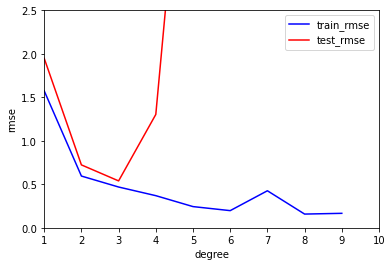

In [26]:
plt.plot(range(1,10),train_rsme_err,c='b',label='train_rmse');
plt.plot(range(1,10),test_rsme_err,c='r',label='test_rmse');
plt.xlabel('degree')
plt.ylabel('rmse')
plt.ylim(0,2.5)
plt.xlim(1,10)
plt.legend();

Thus we see overfitting for higher degree polynomial (>=3). 

In [27]:
# Using poly deg of 3 we make out final poly convertor and
# poly model and save it!
from joblib import dump, load

final_poly_convertor = PolynomialFeatures(degree=3,include_bias=False)
full_converted_X = final_poly_convertor.fit_transform(X)
final_poly_model = LinearRegression()
final_poly_model.fit(full_converted_X,y)
dump(final_poly_model, "models/final_poly_model.joblib")
dump(final_poly_convertor, "models/final_poly_convertor.joblib")

['models/final_poly_convertor.joblib']

In [28]:
# load the convertor and model
loaded_convertor = load("models/final_poly_convertor.joblib")
loaded_model = load("models/final_poly_model.joblib")

# new campaign
campaign = [[142,22,12]]
transformed_campaign = loaded_convertor.fit_transform(campaign)
loaded_model.predict(transformed_campaign)

array([14.41214467])

[top](#toc)

<a id='5'></a>
## Feature Scaling

- Feature scaling improves the convergence of steepest descent algorithms, which do not possess the property of scale invariance. If features are on different scales, certain weights may update faster than others since the feature values $x_j$ play a role in the weight updates.
- Some machine learning models that rely on distance metrics (e.g. KNN) require scaling to perform well.
- There are some ML Algos where scaling won’t have an effect (e.g. decision tress based methods, random forest).
- Scaling the features so that their respective ranges are uniform is important in comparing measurements that have different units. Allows us directly compare model coefficients to each other.
- Feature scaling caveats:
    - Must always scale new unseen data before feeding to model.
    - Effects direct interpretability of feature coefficients -- easier to compare coefficients to one another, harder to relate back to original unscaled feature.

- Two main ways to scale features:
    - **Standardization**: Rescales data to have a mean (μ) of 0 and standard deviation (σ) of 1. Also referred to as *Z-score normalization*.
    <img src="images/FS1.png" style="float:center;" alt="drawing" width="200"/>   
    
    - **Normalization**: Rescales all data values to be between 0-1.
    <img src="images/FS2.png" style="float:center;" alt="drawing" width="250"/> 


- There are many more methods of scaling features and Scikit-Learn provides easy to use classes that “fit” and “transform” feature data for scaling.
    - A .fit() method call simply calculates the necessary statistics (Xmin,Xmax,mean, standard deviation).
    - A .transform() call actually scales data and returns the new scaled version of data.

- Very important consideration for fit and transform:
    - We *only fit to training data*.
    - Calculating statistical information should only come from training data.
    - Don’t want to assume prior knowledge of the test set!
    - Using the full data set would cause data leakage: calculating statistics from full data leads to some information of the test set leaking into the training process upon transform() conversion.

- Feature scaling process:
    - Perform train test split
    - Fit to training feature data
    - Transform training feature data
    - Transform test feature data

- Do we need to scale the label?
    - In general it is not necessary nor advised.
    - Normalising the output distribution is altering the definition of the target.
    - Predicting a distribution that doesn't mirror your real-world target.
    - Can negatively impact stochastic gradient descent [link](stats.stackexchange.com/questions/111467)

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
# import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/Advertising.csv')
X = df.drop('sales',axis=1)
y = df['sales']

polynomial_convertor = PolynomialFeatures(degree=3,include_bias=False)
poly_features = polynomial_convertor.fit_transform(X)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features,y,test_size=0.3, random_state=42)

# perform feature scaling (fit only on taining data!)
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test  = scalar.transform(X_test)

X_train # the values are all standardized

array([[ 1.53003874, -0.8862929 , -1.16598019, ..., -0.72447935,
        -0.64260728, -0.56741817],
       [ 0.34103865, -0.17314426, -0.40960132, ..., -0.49005815,
        -0.48542724, -0.48607391],
       [-0.5202089 , -0.42000341,  0.39526337, ..., -0.43826891,
        -0.23081191, -0.11902137],
       ...,
       [ 0.73338476,  0.68400555,  1.38437419, ...,  0.98466871,
         1.23420682,  1.03910131],
       [ 0.11017646, -0.92743609, -0.62293895, ..., -0.69731572,
        -0.59958111, -0.52677186],
       [ 1.48099548, -0.9205789 , -0.43869282, ..., -0.68627658,
        -0.57490039, -0.49271293]])

[top](#toc)

<a id='6'></a>
## Regularization

Regularization seeks to solve a few common model issues by:
- Minimizing model complexity
- Penalizing the loss function
- Reducing model overfitting (add more bias to reduce model variance)
- Requires a search for optimal penalty hyperparameter

Three main types of Regularization:

- L1 Regularization (LASSO Regression): Least Absolute Shrinkage and Selection Operator (LASSO) adds a penalty equal to the absolute value of the magnitude of coefficients. 
    - Limits the size of the coefficients. 
    - Can yield sparse models as some coefficients can become zero when the tuning parameter λ is sufficiently large (indirectly eliminating the unwanted features and improving the interpretability of the model). 
    <img src="images/Regu11.png" style="float:center;" alt="drawing" width="450"/>
    
- L2 Regularization (Ridge Regression): adds a penalty equal to the square of the magnitude of coefficients.
    - All coefficients are shrunk by the same factor.
    - Does not necessarily eliminate coefficients.
    <img src="images/Regu22.png" style="float:center;" alt="drawing" width="450"/>


- Combining L1 and L2 (Elastic Net): Elastic net combines L1 and L2 with the addition of an alpha parameter deciding the ratio between them.
    <img src="images/Regu33.png" style="float:center;" alt="drawing" width="400"/>    

These regularization methods do have a cost:
Introduce an additional hyperparameters ($\lambda, \alpha$) that needs to be tuned -- a multiplier to the penalty to decide the “strength” of the penalty. Use cross-validation to explore multiple lambda options and then choose the best one!

NOTE - Sklearn refers to lambda as alpha within the class call!

### Deep dive into the three kinds of Regularizations:

<img src="images/Regu55.png" style="float:center;" alt="drawing" width="800"/> 

<img src="images/Regu66.png" style="float:center;" alt="drawing" width="500"/> 

Lasso:
A convex object that lies tangent to the boundary, is likely to encounter a corner of a hypercube, for which some components of β are zero. This is why Lasso is more likely to lead to coefficients as zero.

Ridge: In the case of an n-sphere, the points on the boundary for which some of the components of β are zero are not distinguished from the others and the convex object is no more likely to contact a point at which some components of β are zero than one for which none of them are.

In [31]:
# import Rigde instead of LinearRegression for L2 regularization
from sklearn.linear_model import Ridge

# perform linear regression with L2 regularization (Ridge)
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
test_predictions = ridge_model.predict(X_test)

mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
mae, rmse

(0.6296591346758601, 0.8916327541710896)

[top](#toc)

<a id='7'></a>
## Cross Validation

- We understand the intuition behind performing a train test split, we want to fairly evaluate our model’s performance on unseen data.
- Unfortunately this means we are not able to tune hyperparameters to the entire dataset. 
- Is there a way we can achieve the following:
    - Train on all the data
    - Evaluate on all the data

    <img src="images/CV1.png" style="float:right;" alt="drawing" width="450"/> 

- While it sounds impossible, we can achieve this with cross validation!
- We were able to train on all data and evaluate on all data!
- We get a better sense of true performance across multiple potential splits. What is the cost of this? We have to repeat computations K number of times!
- This is known as K-fold cross-validation. Common choice for K is 10 so each test set is 10% of your total data. Largest K possible would be K equal to the number of number of rows. This is known as *leave one out* cross validation. Computationally expensive!

- If we tune hyperparameters to test data performance, are we ever fairly getting performance metrics? How can we understand how the model behaves for data that is has not seen and not been influenced by for hyperparameter tuning? For this we can use a "hold-out" test set. 

    *Right : CV using Train|Validate|Test split. Left : CV using Train|Validate|Test split with k-fold method.*

    <img src="images/CV.png" style="float:center;" width="800"/> 


- Recall the entire reason to not adjust after the final test data set is to get the fairest evaluation of the model. The model was not fitted to the final test data and the model hyperparameters were not adjusted based off final test data. This is truly never before seen data!


**Cross Validation Metrics**

For cross validation metrics, sklearn uses a “scorer object”.
All scorer objects follow the convention that higher return values are better than lower return values. For example, obviously higher accuracy is better. But higher RMSE is actually worse! So Scikit-Learn fixes this by using a negative RMSE as its scorer metric. This allows for uniformity across all scorer metrics, even across different tasks types. The same idea of uniformity across model classes applies to referring to the penalty strength parameter as alpha.
```
# choose a scorer from the SCORERS dict
from sklearn.metrics import SCORERS
SCORERS.keys()
```
will give the list of all the available scoring metrics for regression, classification etc. Then we can choose one of the keys and use it for the ```scoring``` argument of ```RidgeCV``` model.

### RidgeCV

In [32]:
# Cross Validation along with Ridge regularization
from sklearn.linear_model import RidgeCV

# alphas : range of lambda values
# cv : is the k-fold parameter (default None is 'leave-one-out')
ridge_cv_model = RidgeCV(alphas=(0.1,1.0,10),cv=None,
                        scoring='neg_root_mean_squared_error')

# since we are only fitting on (X_train,y_train), this means that
# the (X_test,y_test) is our hold-out TEST set, also
# (X_train,y_train) = TRAIN + VALIDATION
ridge_cv_model.fit(X_train,y_train)

# best alpha (lambda)
ridge_cv_model.alpha_

0.1

In [33]:
test_predictions = ridge_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test, test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
MAE, RMSE

(0.46671241132084407, 0.5945136671856113)

- Ridge with alpha=10
    - MAE = 0.63
    - RMSE = 0.89
    
- RidgeCV we get best alpha=0.1
    - MAE = 0.46
    - RMSE = 0.59

In [34]:
ridge_cv_model.coef_

array([ 5.90523815,  0.46316396,  0.68028713, -6.17743395,  3.73671928,
       -1.40708382,  0.00624704,  0.11128917, -0.2617823 ,  2.17135744,
       -0.51480159,  0.70587211,  0.60311504, -0.53271216,  0.5716495 ,
       -0.34685826,  0.36744388, -0.03938079, -0.12192939])

Note that the model coeffs are not close to zero anymore. This will not be the case with L1 regularization (LASSO Regression).

### LassoCV

In [35]:
# Cross Validation along with LASSO regularization
from sklearn.linear_model import LassoCV

# eps : alpha_min/alpha_max
# n_alpahs : no. of alphas we want to check
# cv : is the k-fold parameter (default None is 5-fold CV)
# max_iter : need to increase it if convergence warning shows up
lasso_cv_model = LassoCV(eps=1e-3,n_alphas=100,cv=None,
                         max_iter=10000)

# since we are only fitting on (X_train,y_train), this means that
# the (X_test,y_test) is our hold-out TEST set, also
# (X_train,y_train) = TRAIN + VALIDATION
lasso_cv_model.fit(X_train,y_train)

# best alpha (lambda)
lasso_cv_model.alpha_

0.0049245318064748715

In [36]:
test_predictions = lasso_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test, test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
MAE, RMSE

(0.5123045552899828, 0.6308043049172882)

- Ridge with alpha=10
    - MAE = 0.63
    - RMSE = 0.89
    
- RidgeCV we get best alpha=0.1
    - MAE = 0.46
    - RMSE = 0.59
    
- LassoCV we get best alpha=0.0049
    - MAE = 0.51
    - RMSE = 0.63

In [37]:
lasso_cv_model.coef_

array([ 5.15048089,  0.4274257 ,  0.29684446, -4.53337994,  3.38937185,
       -0.4288993 ,  0.        ,  0.        ,  0.        ,  1.17891049,
       -0.        ,  0.        ,  0.16706037, -0.        ,  0.        ,
        0.        ,  0.11083672,  0.        ,  0.06155549])

Note that most of the model coeffs are close to zero. Hence, it is easier to interpret which features are important. It is still more in-line with Ridge regression in terms of MAE and RMSE. And it can be considered slightly better than Ridge as we were able to drop almost half of the features and still get the same performance.

### ElasticNetCV

In [38]:
# Cross Validation along with LASSO regularization
from sklearn.linear_model import ElasticNetCV

# l1_ratio : alpha in the formula
# eps : alpha_min/alpha_max (alpha here is the lambda)
# n_alpahs : no. of alphas we want to check
# cv : is the k-fold parameter (default None is 5-fold CV)
# max_iter : need to increase it if convergence warning shows up
elastic_cv_model = ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1],
                              eps=1e-3,n_alphas=100,cv=5,
                              max_iter=10000)

# since we are only fitting on (X_train,y_train), this means that
# the (X_test,y_test) is our hold-out TEST set, also
# (X_train,y_train) = TRAIN + VALIDATION
elastic_cv_model.fit(X_train,y_train)

# best alpha (lambda)
print(elastic_cv_model.l1_ratio_) # 1 => Lasso is better

# best alpha (lambda)
elastic_cv_model.alpha_

1.0


0.0049245318064748715

In [39]:
test_predictions = elastic_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test, test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
MAE, RMSE

(0.5123045552899828, 0.6308043049172882)

- Ridge with alpha=10
    - MAE = 0.63
    - RMSE = 0.89
    
- RidgeCV we get best alpha=0.1
    - MAE = 0.46
    - RMSE = 0.59
    
- LassoCV we get best alpha=0.0049
    - MAE = 0.51
    - RMSE = 0.63
    
- ElasticNetCV we get best alpha=0.0049
    - MAE = 0.51
    - RMSE = 0.63
    
Thus, ElasticNetCV tells us that LASSO is better.

### CV using Train|Validate|Test split

Note that not every ML model in sklearn has the CV version. We need make our own full Cross Validaiton stratergy which we can then use with any ML model.

The Test set is often also called a "hold-out" set, since you should not adjust parameters based on the final test set, but instead use it *only* for reporting final expected performance.

0. Clean and adjust data as necessary for X and y
1. Split Data in Train/Validation/Test for both X and y
2. Fit/Train Scaler on Training X Data
3. Scale X Eval Data
4. Create Model
5. Fit/Train Model on X Train Data
6. Evaluate Model on X Evaluation Data (by creating predictions and comparing to Y_eval)
7. Adjust Parameters as Necessary and repeat steps 5 and 6
8. Get final metrics on Test set (not allowed to go back and adjust after this!)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Split #1
X_train, X_other, y_train, y_other = \
train_test_split(X,y,test_size=0.3,random_state=42)
# Split #2
X_eval, X_test, y_eval, y_test = \
train_test_split(X_other,y_other,test_size=0.5)

# Scale
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_eval  = scalar.transform(X_eval)
X_test  = scalar.transform(X_test)

# Model #1 w/o CV
model_1 = Ridge(alpha=100)
model_1.fit(X_train, y_train)
eval_predictions_1 = model_1.predict(X_eval)
mse_1 = mean_squared_error(y_eval, eval_predictions_1)
print(mse_1)

# Model #2 w/o CV (based on mse of Model #1)
model_2 = Ridge(alpha=1)
model_2.fit(X_train, y_train)
eval_predictions_2 = model_2.predict(X_eval)
mse_2 = mean_squared_error(y_eval, eval_predictions_2)
print(mse_2)

# Final performance (assuming Model #2 is the best)
test_predictions = model_2.predict(X_test)
mse_final = mean_squared_error(y_test, test_predictions)
print(mse_final)


5.073810784619559
3.6501126344333716
3.9502523815416732


- Much better! We could repeat this until satisfied with performance metrics. (We previously showed RidgeCV can do this for us, but the purpose of here is to generalize the CV process for any model).

### CV using Train|Validate|Test split with k-fold method

- The **cross_val_score()** function uses a model and training set (along with a K and chosen metric) to perform all of this for us automatically!
- This allows for K-Fold cross validation to be performed on any model.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score # NEW!

# Split
X_train, X_test, y_train, y_test = \
train_test_split(X,y,test_size=0.3,random_state=42)

# Scale
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test  = scalar.transform(X_test)

# Model #1 w/ k-fold CV
model_1 = Ridge(alpha=100)
scores_1 = cross_val_score(model_1,X_train,y_train,
                         scoring='neg_mean_squared_error',cv=5)
print(abs(scores_1.mean()))

# Model #2 w/ k-fold CV (based on mse of Model #1)
model_2 = Ridge(alpha=1)
scores_2 = cross_val_score(model_2,X_train,y_train,
                         scoring='neg_mean_squared_error',cv=5)
print(abs(scores_2.mean()))

# Fit on the final model (assuming Model #2 is the best)
model_2.fit(X_train,y_train)

# Final performance
test_predictions = model_2.predict(X_test)
mse_final = mean_squared_error(y_test, test_predictions)
print(mse_final)

7.7712748271872725
2.772968978937122
3.800182507987522


### CV using Train|Validate|Test split with k-fold method

- The **cross_validate()** function allows us to view multiple performance metrics from cross validation on a model and explore how much time fitting and testing took.
- The cross_validate function differs from cross_val_score in two ways:
    - It allows specifying multiple metrics for evaluation.
    - It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate # NEW!

# Split
X_train, X_test, y_train, y_test = \
train_test_split(X,y,test_size=0.3,random_state=42)

# Scale
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test  = scalar.transform(X_test)

# Model #1 w/ k-fold CV
model_1 = Ridge(alpha=100)
scores_1 = cross_validate(model_1,X_train,y_train,cv=10,
                          scoring=['neg_mean_absolute_error',
                                   'neg_mean_squared_error'])
scores_1 = pd.DataFrame(scores_1)
#print(scores_1, '\n')
print(abs(scores_1.mean()),'\n')

# Model #2 w/ CV (based on mse of Model #1)
model_2 = Ridge(alpha=1)
scores_2 = cross_validate(model_2,X_train,y_train,cv=10,
                          scoring=['neg_mean_absolute_error',
                                   'neg_mean_squared_error'])
scores_2 = pd.DataFrame(scores_2)
#print(scores_2, '\n')
print(abs(scores_2.mean()),'\n')

# Fit on the final model (assuming Model #2 is the best)
model_2.fit(X_train,y_train)

# Final performance
test_predictions = model_2.predict(X_test)
mse_final = mean_squared_error(y_test, test_predictions)
print(mse_final)

fit_time                        0.001279
score_time                      0.001300
test_neg_mean_absolute_error    2.033951
test_neg_mean_squared_error     7.093781
dtype: float64 

fit_time                        0.002083
score_time                      0.001294
test_neg_mean_absolute_error    1.220442
test_neg_mean_squared_error     2.763198
dtype: float64 

3.800182507987522


In [43]:
scores_2

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.007282,0.000938,-1.331710,-2.911867
1,0.000940,0.000789,-1.269023,-2.784154
2,0.000999,0.001140,-0.876497,-1.098295
3,0.003053,0.002225,-1.113152,-1.812891
4,0.001275,0.000921,-1.257662,-2.308968
5,0.001332,0.000831,-1.067477,-2.051892
6,0.001212,0.001895,-1.304290,-2.431973
7,0.002322,0.002408,-1.376223,-2.229323
8,0.001428,0.000822,-1.760545,-8.569988
9,0.000991,0.000968,-0.847836,-1.432624


### Grid Search

**Parameter Checking + CRoss-Validaiton**

- Often more complex models have multiple adjustable hyperparameters. A grid search is a way of training and validating a model on every possible combination of multiple hyperparameter options. 
- Scikit-Learn includes a **GridSearchCV** class capable of testing a dictionary of multiple hyperparameter options through cross-validation. This allows for both cross-validation and a grid search to be performed in a generalized way for any model.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV # NEW!

# Split
X_train, X_test, y_train, y_test = \
train_test_split(X,y,test_size=0.3,random_state=42)

# Scale
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test  = scalar.transform(X_test)

# Model
base_elastic_net = ElasticNet()

# Grid for the base_elastic_net's parameters
parameter_grid = {'alpha':[.1,1,5,10,50,100], 
                  'l1_ratio':[.1,.5,.7,.95,.99,1]}

# Grid model with model + parameter_grid as imputs
grid_model = GridSearchCV(estimator=base_elastic_net,
                          param_grid=parameter_grid,cv=10,
                          scoring='neg_mean_squared_error',
                          verbose=0)
grid_model.fit(X_train,y_train)

# Best model parameters
print(grid_model.best_estimator_)

# Final performance
# predict() grabs the best estimator (model)
test_predictions = grid_model.predict(X_test)
mse_final = mean_squared_error(y_test, test_predictions)
print(mse_final)

ElasticNet(alpha=0.1, l1_ratio=1)
3.69633774054782


In [48]:
from sklearn.metrics import r2_score
r2_score(y_test, test_predictions)

0.8646258647835886